In [ ]:
pip install autokeras

In [2]:
from autokeras import StructuredDataRegressor
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import sklearn
import autokeras as ak

In [3]:
df=read_csv("drive/MyDrive/iisc_data/train_data_3Ra.csv")
X=df[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant', 'Toolwear', 'Avg Spindle Power']]
Y=df[['Ra']]
X=np.array(X)
Y=np.array(Y)
merge = np.append(X, Y, axis = 1)
np.random.shuffle(merge)
xtrain, xtest, ytrain, ytest = train_test_split(merge[:,:-1], merge[:,-1], test_size=0.01, random_state=1)


In [4]:
print(merge.shape)

(15854, 9)


In [5]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(15695, 8)
(15695,)
(159, 8)
(159,)


In [6]:
input_node = ak.StructuredDataInput()
output_node = ak.DenseBlock()(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.DenseBlock()(output_node)

output_node = ak.RegressionHead()(output_node)
reg = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=40, overwrite=True
)
reg.fit(xtrain, ytrain, epochs=50)

Trial 40 Complete [00h 01m 29s]
val_loss: 0.3058324456214905

Best val_loss So Far: 0.2086441069841385
Total elapsed time: 01h 18m 05s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
491/491 [==============================] - 4s 6ms/step - loss: 0.5918 - mean_squared_error: 0.5918
Epoch 2/50
491/491 [==============================] - 3s 6ms/step - loss: 0.4494 - mean_squared_error: 0.4494
Epoch 3/50
491/491 [==============================] - 3s 6ms/step - loss: 0.4025 - mean_squared_error: 0.4025
Epoch 4/50
491/491 [==============================] - 3s 6ms/step - loss: 0.3910 - mean_squared_error: 0.3910
Epoch 5/50
491/491 [==============================] - 3s 6ms/step - loss: 0.3817 - mean_squared_error: 0.3817
Epoch 6/50
491/491 [==============================] - 3s 6ms/step - loss: 0.3665 - mean_squared_error: 0.3665
Epoch 7/50
491/491 [==============================] - 3s 6ms/step - loss: 0.3608 - mean_squared_error: 0.3608
Epoch 8/50
491/491 [==============================] - 3s 

In [7]:
model = reg.export_model()
model.summary()
yhat=model.predict(xtest)
#yhat = search.predict(xtest)
mae = mean_absolute_error(ytest, yhat)
print(mae)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 re_lu_2 (ReLU)              (None, 32)                0     

In [ ]:
import pickle
pickle.dump(model, open('drive/MyDrive/iisc_data/model_3Ra_2.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://20853182-32cb-4f0e-a66d-3626594ef461/assets


In [ ]:
import matplotlib.pyplot as plt

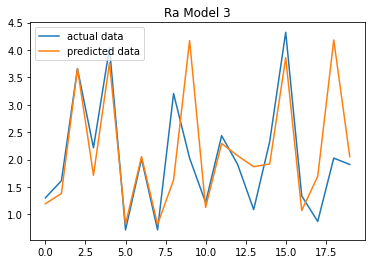

In [ ]:
plt.plot(ytest[20:40], label="actual data")
plt.plot(yhat[20:40,0], label="predicted data")
plt.title("Ra Model 3")
plt.legend()
plt.show()